In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [2]:

def downsize(image):
    channels = []
    for i in range(3):
        channels.append(convolve2d(image[:,:,i], np.ones((5,5))/25, mode='valid')[::4,::4])
    return np.array(channels).transpose([1,2,0]).astype(np.uint8)

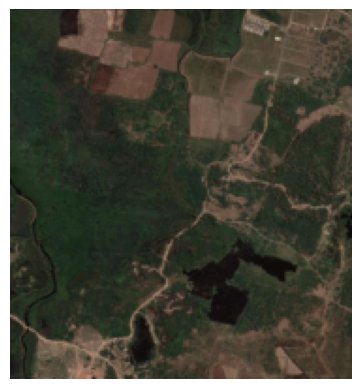

In [3]:
image = Image.open('satellite.png')
image = np.asarray(image)
image = downsize(image)
plt.imshow(image)
plt.axis('off')
plt.show()

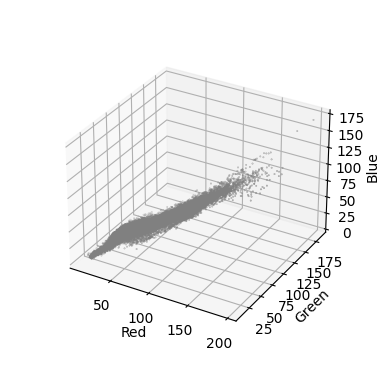

In [4]:
data = image.reshape((-1, 3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data[:,0]
y = data[:,1]
z = data[:,2]

ax.scatter(x, y, z, marker='o', s=0.1, color='gray')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue', rotation=90)
ax.set_box_aspect(None, zoom=0.8)
plt.show()

In [6]:
from k_means import kmeans

segments = 5
model = kmeans(k=segments)
labels = model.fit(data, epsilon=1e-1)

In [7]:
avg = np.zeros(segments)
segmented_image = np.zeros_like(data)

for i in range(segments):
    cluster_map = (labels == i)
    segmented_image[cluster_map] = data[cluster_map].mean(axis=0)

segmented_image = segmented_image.reshape(image.shape)

In [8]:
segmented_image.shape

(197, 182, 3)

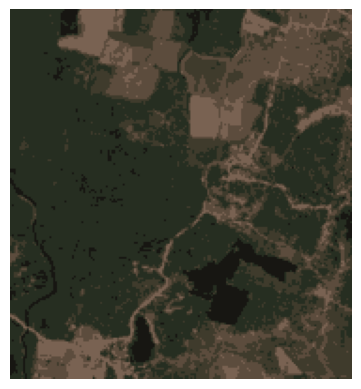

In [9]:
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

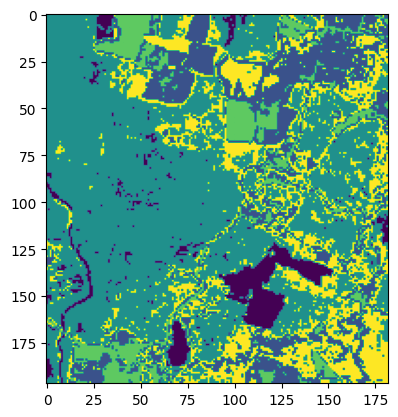

In [10]:
plt.imshow(labels.reshape(image.shape[:-1]))
plt.show()

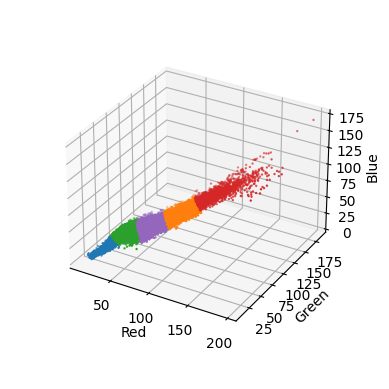

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data[:,0]
y = data[:,1]
z = data[:,2]


for i in range(segments):
    map = (labels == i)
    ax.scatter(x[map], y[map], z[map], marker='o', s=0.5)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue', rotation=90)
ax.set_box_aspect(None, zoom=0.8)
plt.show()